#Çoklu doğrusal gerileme

Çoklu doğrusal regresyon , gözlemlenen verilere doğrusal bir denklem uydurarak iki veya daha fazla özellik ve bir yanıt arasındaki ilişkiyi modellemeye çalışır .
Açıkça, basit doğrusal regresyonun bir uzantısından başka bir şey değildir. p özelliği (veya bağımsız değişkenleri) ve bir yanıtı (veya bağımlı değişkeni) 
olan bir veri kümesi düşünün . Ayrıca, veri kümesi n satır/gözlem içerir. Şunu tanımlarız: X ( özellik matrisi ) = n X p boyutunda bir matris, burada x_{ij}, i. gözlem için j. özelliğin değerlerini gösterir. Yani,  ve y ( yanıt vektörü ) ​​= n boyutunda bir vektör


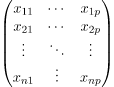

burada y_{i}, i. gözlem için yanıtın değerini belirtir. p

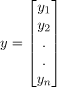

özellikleri için regresyon çizgisi şu şekilde temsil edilir:  burada h(x_i) i. gözlem için tahmin edilen yanıt değeridir ve b_0, b_1, …, b_p regresyon katsayılarıdır . Ayrıca şunu yazabiliriz:  burada e_i , ith gözlemindeki artık hatayı temsil eder. Özellik matrisi X'i şu şekilde temsil ederek doğrusal modelimizi biraz daha genelleştirebiliriz :  Şimdi, doğrusal model şu şekilde matrisler cinsinden ifade edilebilir:  nerede  ve Şimdi, b'nin bir tahminini , yani b' kullanarak belirliyoruz.

image.png

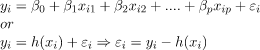

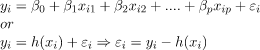

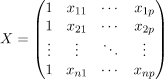

image.png

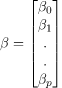

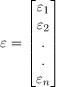

En Küçük Kareler yöntemi .
Daha önce açıklandığı gibi, En Küçük Kareler yöntemi, toplam artık hatanın en aza indirildiği b' belirleme eğilimindedir.
Sonucu doğrudan burada görüyoruz:

image.png

burada ' matrisin devriğini temsil ederken, -1 matris tersini temsil eder.
En küçük kareler tahminleri b' bilinerek, çoklu doğrusal regresyon modeli şu şekilde tahmin edilebilir:

image.png

burada y' tahmin edilen yanıt vektörüdür .
Not: Çoklu doğrusal regresyonda en küçük kareler tahminlerini elde etmek için tam türetme kullanilabilir.




Kod: Scikit-learn kullanılarak Boston ev fiyatlandırma veri kümesinde çoklu doğrusal regresyon tekniklerinin Python uygulaması. 


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model,metrics
from sklearn.model_selection import train_test_split

Regresyon Katsayısı :  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Varyans Puanım : 0.7209056672661777


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

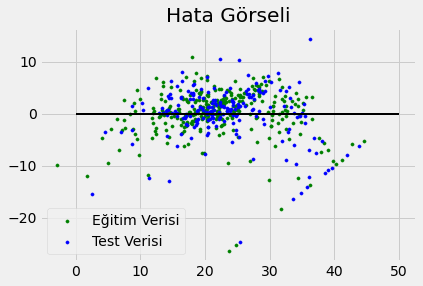

In [10]:
boston = datasets.load_boston(return_X_y=False)

x = boston.data
y = boston.target

X_train, X_test, y_train, Y_test = train_test_split(X,y,test_size = 0.4,random_state=1)

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

print("Regresyon Katsayısı : ",reg.coef_)

print("Varyans Puanım : {}".format(reg.score(X_test,y_test)))

plt.style.use("fivethirtyeight")

plt.scatter(reg.predict(X_train),reg.predict(X_train) - y_train, color = 'g', s= 10, label = "Eğitim Verisi")

plt.scatter(reg.predict(X_test), reg.predict(X_test)- y_test, color = "blue", s = 10, label = "Test Verisi")

plt.hlines(y=0,xmin = 0, xmax = 50, linewidth = 2 ) 

plt.legend(loc = 'Zirve')

plt.title ("Hata Görseli")

plt.show()